In [122]:
pip install plotly[notebook]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

In [3]:
df = pd.read_csv('flipkart_com-ecommerce_sample.csv')

In [3]:
df.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree               pid  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1  ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2  ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   

   retail_price  discounted_price  \
0         999.0             379.0   
1       32157.0           22646.0   
2         999.0             499.0   
3         699.0             267.0   
4         220.0             210.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img6a.flixcart.com/image/sofa-bed/j/f...                    False   
2  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
3  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
4  ["http://img5a.flixcart.com/image/pet-shampoo/...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  FabHomeDecor Fabric Double Sofa Bed (Finish Co...  No rating available   
2  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Specifications of Sicons All Purpose Arnica Do...  No rating available   

        overall_rating         brand  \
0  No rating available        Alisha   
1  No rating available  FabHomeDecor   
2  No rating available            AW   
3  No rating available        Alisha   
4  No rating available        Sicons   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Number of ...  
1  {"product_specification"=>[{"key"=>"Installati...  
2  {"product_specification"=>[{"key"=>"Ideal For"...  
3  {"product_specification"=>[{"key"=>"Number of ...  
4  {"product_specification"=>[{"key"=>"Pet Type",...

In [4]:
df.shape

(20000, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [6]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [10]:
df[df['brand'].isnull()].head(5)

uniq_id            crawl_timestamp  \
25  bb41283056536d7af11e994ba4f9db81  2016-01-03 20:56:50 +0000   
26  ea91e47cac68b132887d7fc1175e91c2  2016-01-03 20:56:50 +0000   
27  bec784ef794cf596dbe2cbbaf5427ef0  2016-01-03 20:56:50 +0000   
28  171e0bcea390c17fd70e3ffa6c2cd187  2016-01-03 20:56:50 +0000   
29  a60ebb7803c6a31795de3f8949cb6f98  2016-01-03 20:56:50 +0000   

                                          product_url  \
25  http://www.flipkart.com/glus-wedding-lingerie-...   
26  http://www.flipkart.com/veelys-shiny-white-qua...   
27  http://www.flipkart.com/bulaky-vanity-case-jew...   
28  http://www.flipkart.com/fdt-women-s-leggings/p...   
29  http://www.flipkart.com/madcaps-c38gr30-men-s-...   

                                         product_name  \
25                          Glus Wedding Lingerie Set   
26  Veelys Shiny White Quad Roller Skates - Size 4...   
27           Bulaky vanity case Jewellery Vanity Case   
28                               FDT Women's Leggings   
29                       Madcaps C38GR30 Men's Cargos   

                                product_category_tree               pid  \
25  ["Clothing >> Women's Clothing >> Lingerie, Sl...  LINE92U9KGZG25AY   
26  ["Sports & Fitness >> Other Sports >> Skating ...  SKTEC88WSNYJKWY7   
27  ["Beauty and Personal Care >> Makeup >> Vanity...  VANDZY4YZFPEG85T   
28  ["Clothing >> Women's Clothing >> Fusion Wear ...  LJGEB2KMCMMHHFC7   
29  ["Clothing >> Men's Clothing >> Cargos, Shorts...  CRGE6A53UX7CJMXX   

    retail_price  discounted_price  \
25        1299.0             699.0   
26        3199.0            2499.0   
27         499.0             390.0   
28         699.0             309.0   
29        2199.0            1699.0   

                                                image  \
25  ["http://img5a.flixcart.com/image/lingerie-set...   
26  ["http://img6a.flixcart.com/image/skate/w/y/7/...   
27  ["http://img6a.flixcart.com/image/vanity-box/8...   
28  ["http://img6a.flixcart.com/image/legging-jegg...   
29  ["http://img5a.flixcart.com/image/cargo/n/g/h/...   

    is_FK_Advantage_product  \
25                    False   
26                    False   
27                    False   
28                    False   
29                    False   

                                          description       product_rating  \
25  Glus Wedding Lingerie Set - Buy Turquoise Glus...  No rating available   
26  Veelys Shiny White Quad Roller Skates - Size 4...  No rating available   
27  Buy Bulaky vanity case Jewellery Vanity Case f...                    3   
28  FDT Women's Leggings - Buy Parrot Green FDT Wo...  No rating available   
29  Madcaps C38GR30 Men's Cargos - Buy Green Madca...  No rating available   

         overall_rating brand  \
25  No rating available   NaN   
26  No rating available   NaN   
27                    3   NaN   
28  No rating available   NaN   
29  No rating available   NaN   

                               product_specifications  
25  {"product_specification"=>[{"key"=>"Number of ...  
26  {"product_specification"=>[{"key"=>"Playing Le...  
27  {"product_specification"=>{"key"=>"Body Materi...  
28  {"product_specification"=>[{"key"=>"Number of ...  
29  {"product_specification"=>[{"key"=>"Number of ...

In [21]:
df['discounted_price'].unique().sum()

np.float64(nan)

df.nunique()

In [24]:
df['retail_price'].fillna(df['retail_price'].median(), inplace = True)
df['discounted_price'].fillna(df['discounted_price'].median(), inplace = True)

In [25]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [27]:
x = df['retail_price']-df['discounted_price']
y = (x/df['retail_price'])*100
df['discount_percentage']=y

In [28]:
df.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree               pid  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1  ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2  ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   

   retail_price  discounted_price  \
0         999.0             379.0   
1       32157.0           22646.0   
2         999.0             499.0   
3         699.0             267.0   
4         220.0             210.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img6a.flixcart.com/image/sofa-bed/j/f...                    False   
2  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
3  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
4  ["http://img5a.flixcart.com/image/pet-shampoo/...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  FabHomeDecor Fabric Double Sofa Bed (Finish Co...  No rating available   
2  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Specifications of Sicons All Purpose Arnica Do...  No rating available   

        overall_rating         brand  \
0  No rating available        Alisha   
1  No rating available  FabHomeDecor   
2  No rating available            AW   
3  No rating available        Alisha   
4  No rating available        Sicons   

                              product_specifications  discount_percentage  
0  {"product_specification"=>[{"key"=>"Number of ...            62.062062  
1  {"product_specification"=>[{"key"=>"Installati...            29.576764  
2  {"product_specification"=>[{"key"=>"Ideal For"...            50.050050  
3  {"product_specification"=>[{"key"=>"Number of ...            61.802575  
4  {"product_specification"=>[{"key"=>"Pet Type",...             4.545455

In [33]:
top_10_brands = df['brand'].value_counts().head(10)
top_10_brands

brand
Allure Auto     469
Regular         313
Voylla          299
Slim            288
TheLostPuppy    229
Karatcraft      211
Black           167
White           155
DailyObjects    144
Speedwav        141
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x242c183e720>,
 [Text(0.9017048608440458, 0.6300224947811153, 'Allure Auto'),
  Text(-0.0614737154476889, 1.0982809213990092, 'Regular'),
  Text(-0.8276524696510001, 0.7245628954622233, 'Voylla'),
  Text(-1.098925115113134, -0.048616780781796355, 'Slim'),
  Text(-0.8295337189605687, -0.722408339588801, 'TheLostPuppy'),
  Text(-0.30628584259938985, -1.0564984536776103, 'Karatcraft'),
  Text(0.22860924489836884, -1.07598225503351, 'Black'),
  Text(0.6463318764944109, -0.8900871336151387, 'White'),
  Text(0.9355043046426281, -0.5786464343579012, 'DailyObjects'),
  Text(1.0815630495078759, -0.20055266126188442, 'Speedwav')],
 [Text(0.49183901500584304, 0.3436486335169719, '19.4%'),
  Text(-0.03353111751692121, 0.599062320763096, '13.0%'),
  Text(-0.4514468016278182, 0.3952161247975763, '12.4%'),
  Text(-0.5994136991526186, -0.02651824406279801, '11.9%'),
  Text(-0.45247293761485563, -0.39404091250298234, '9.5%'),
  Text(-0.16706500505421262, -0.5762718838241

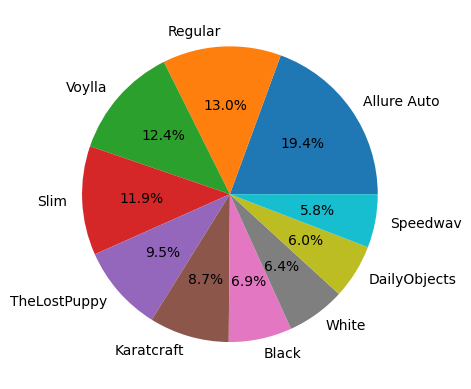

In [40]:
labels = ['Allure Auto', 'Regular', 'Voylla', 'Slim' ,'TheLostPuppy' ,'Karatcraft','Black','White', 'DailyObjects','Speedwav']
plt.pie(top_10_brands, labels = labels, autopct = '%1.1f%%')

In [46]:
df['product_category_tree'].loc[2]

'["Footwear >> Women\'s Footwear >> Ballerinas >> AW Bellies"]'

In [47]:
df['main_category'] = df['product_category_tree'].str.extract(r'\["([^>>]+)')[0]

In [48]:
df.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree               pid  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1  ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2  ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   

   retail_price  discounted_price  \
0         999.0             379.0   
1       32157.0           22646.0   
2         999.0             499.0   
3         699.0             267.0   
4         220.0             210.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img6a.flixcart.com/image/sofa-bed/j/f...                    False   
2  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
3  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
4  ["http://img5a.flixcart.com/image/pet-shampoo/...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  FabHomeDecor Fabric Double Sofa Bed (Finish Co...  No rating available   
2  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Specifications of Sicons All Purpose Arnica Do...  No rating available   

        overall_rating         brand  \
0  No rating available        Alisha   
1  No rating available  FabHomeDecor   
2  No rating available            AW   
3  No rating available        Alisha   
4  No rating available        Sicons   

                              product_specifications  discount_percentage  \
0  {"product_specification"=>[{"key"=>"Number of ...            62.062062   
1  {"product_specification"=>[{"key"=>"Installati...            29.576764   
2  {"product_specification"=>[{"key"=>"Ideal For"...            50.050050   
3  {"product_specification"=>[{"key"=>"Number of ...            61.802575   
4  {"product_specification"=>[{"key"=>"Pet Type",...             4.545455   

   main_category  
0      Clothing   
1     Furniture   
2      Footwear   
3      Clothing   
4  Pet Supplies

In [52]:
top_10_products= df['main_category'].value_counts().head(10)

In [53]:
print(top_10_products)

main_category
Clothing                       6198
Jewellery                      3531
Footwear                       1227
Mobiles & Accessories          1099
Automotive                     1012
Home Decor & Festive Needs      929
Beauty and Personal Care        710
Home Furnishing                 700
Kitchen & Dining                647
Computers                       578
Name: count, dtype: int64


In [54]:
labels = ['Clothing','Jewellery', 'Footwear','Mobiles & Accessories', 'Automotive','Home Decor & Festive Needs', 'Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining','Computers'] 

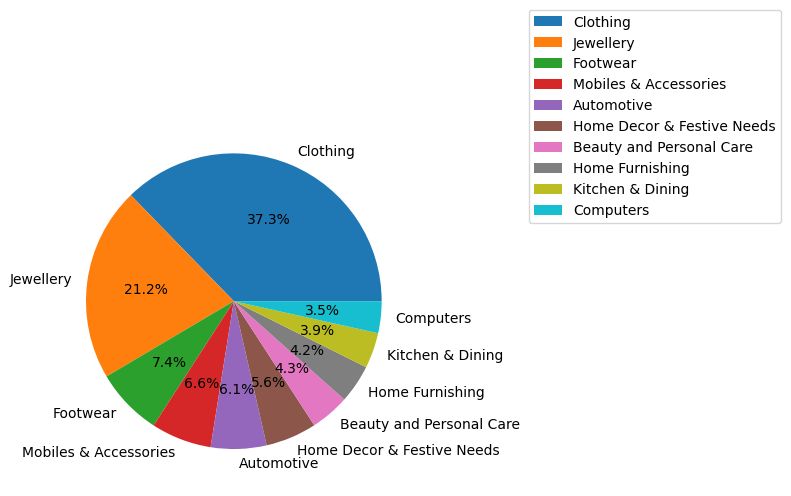

In [63]:
plt.pie(top_10_products, labels = labels, autopct = '%1.1f%%')
plt.legend(labels, loc ='right', bbox_to_anchor=(2, 1))

#Top 10 brands based on discount percentage

In [78]:
brand_avg_discount = df.groupby('brand')['discount_percentage'].mean()
top_10_brands_by_discount = brand_avg_discount.nlargest(10).index
df_top_10 = df[df['brand'].isin(top_10_brands_by_discount)]
sorted_brands = df_top_10.groupby('brand')['discount_percentage'].mean().sort_values(ascending=False).index

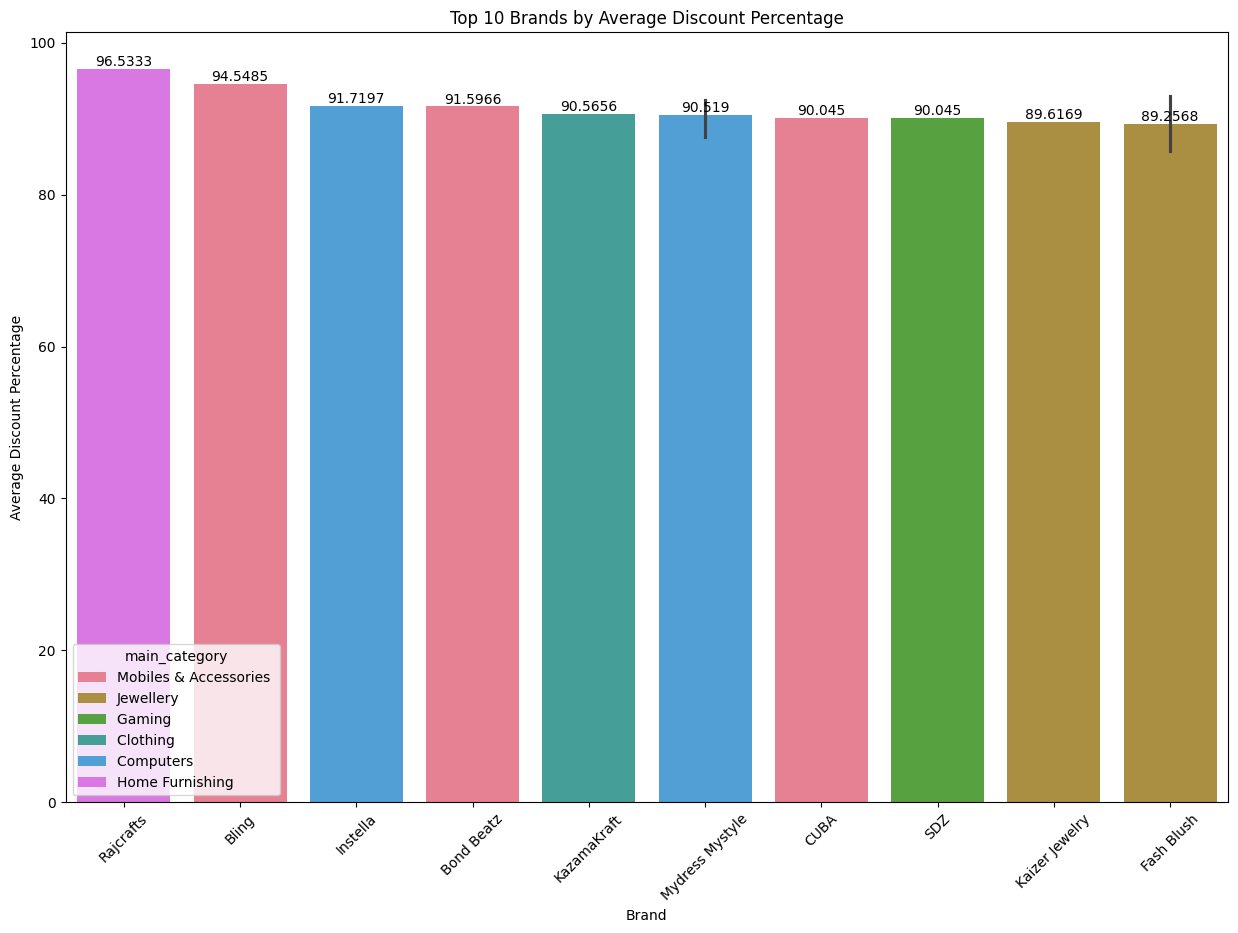

In [82]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='brand', y='discount_percentage', data=df_top_10, order=sorted_brands, palette = 'husl', hue='main_category')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)
plt.title('Top 10 Brands by Average Discount Percentage')
plt.xlabel('Brand')
plt.ylabel('Average Discount Percentage')
plt.show()

In [96]:
df_customers = df.groupby('uniq_id')[['discounted_price']].sum().sort_values(by=['discounted_price'],ascending=False)

C:\Users\User\AppData\Local\Temp\ipykernel_16084\2053324956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='uniq_id', y='discounted_price', data=list1, palette='husl')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '329c5f4d7aced63e1ce3e88f41d5e7e6'),
  Text(1, 0, '08452abdadb3db1e686b94a9c52fc7b6'),
  Text(2, 0, '3a2546675bc399953779e58d84d56650'),
  Text(3, 0, 'd9fa5b1d8917b841abaef2a1ce032114'),
  Text(4, 0, '07b0df742cdcac28d09c29a1e246fff2'),
  Text(5, 0, 'c4b045288524a8770c760ed2bbca2ed5'),
  Text(6, 0, '710ed5f2393a4b9e8823aa0029f71f93'),
  Text(7, 0, 'dd96000fa1d9e408a4fc47ea5c1123e5'),
  Text(8, 0, 'eb15c8c168e9ebb8d24deac65e0aec37'),
  Text(9, 0, '5f8e0c25e2915bc2383e60ad02b1e4aa'),
  Text(10, 0, '30f324f95b6f5c26284893d0d85becf1'),
  Text(11, 0, 'e794bd226967af2298a2c7a1f8e2c9bb'),
  Text(12, 0, 'e3e08f67f1e0b5724e71c6845a7f0ffa'),
  Text(13, 0, 'b92dedcdcec57fe018148b9b2db237f7'),
  Text(14, 0, '069a49081494492829bd914203a8bd52'),
  Text(15, 0, '44ac0b6808242ce5c71b971d7620c609'),
  Text(16, 0, '43e444307157aca6bb055c4bada67928'),
  Text(17, 0, '1b1c83326a749b99c9cafc740f9136fa'),
  Text(18, 0, 'e0de

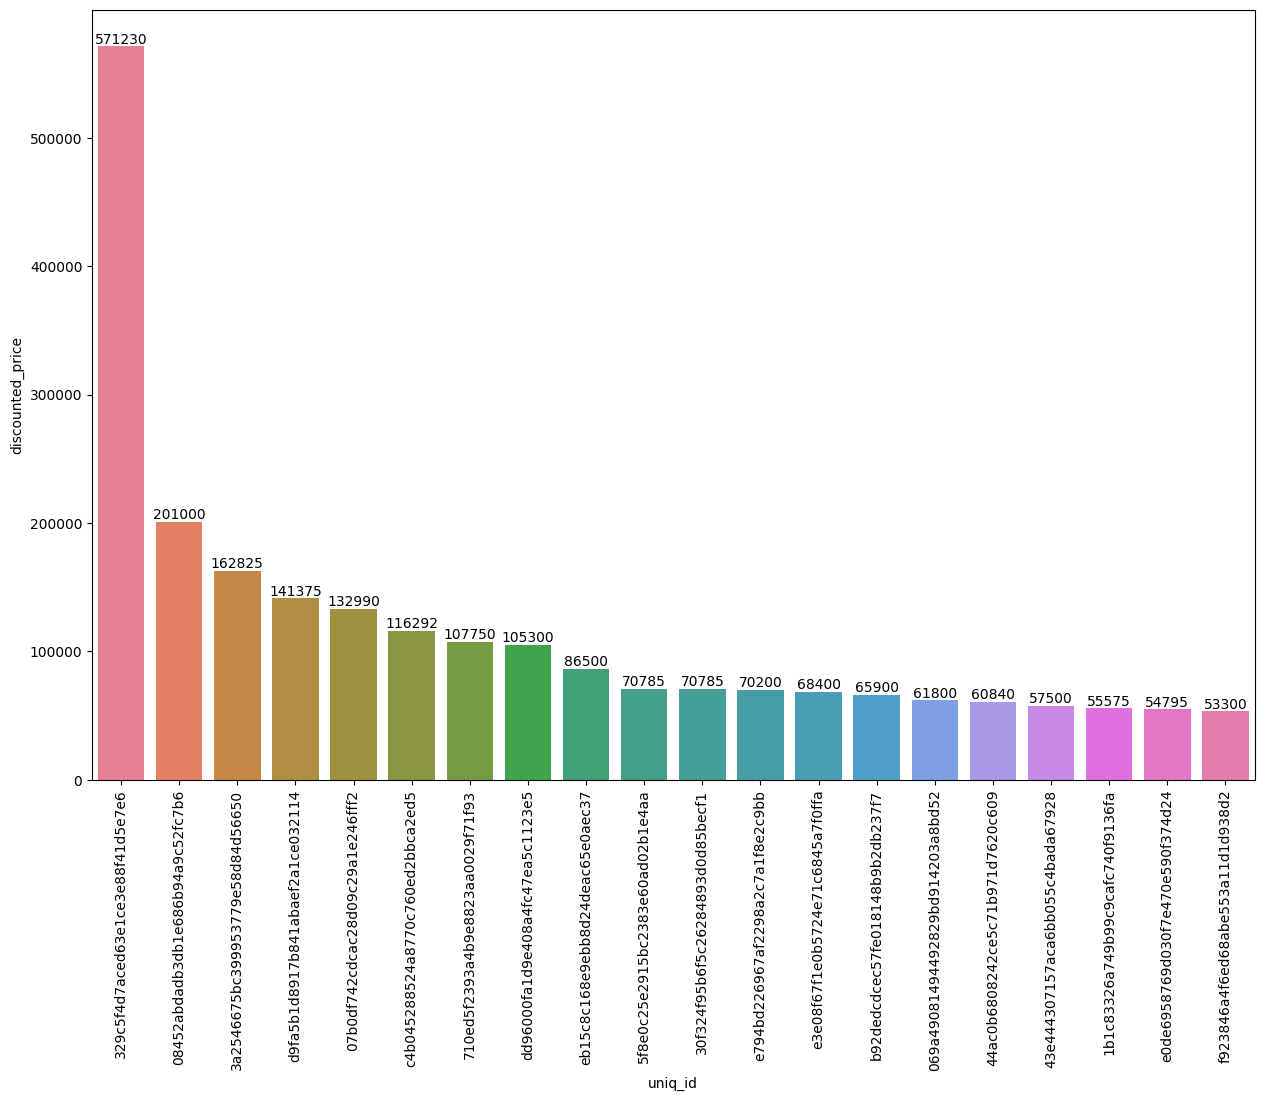

In [108]:
list1= df_customers[:20]
plt.figure(figsize=(15,10))
ax = sns.barplot(x='uniq_id', y='discounted_price', data=list1, palette='husl')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=90)

In [109]:
df.head()

uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
2  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
3  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree               pid  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1  ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2  ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   

   retail_price  discounted_price  \
0         999.0             379.0   
1       32157.0           22646.0   
2         999.0             499.0   
3         699.0             267.0   
4         220.0             210.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img6a.flixcart.com/image/sofa-bed/j/f...                    False   
2  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
3  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
4  ["http://img5a.flixcart.com/image/pet-shampoo/...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  FabHomeDecor Fabric Double Sofa Bed (Finish Co...  No rating available   
2  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Specifications of Sicons All Purpose Arnica Do...  No rating available   

        overall_rating         brand  \
0  No rating available        Alisha   
1  No rating available  FabHomeDecor   
2  No rating available            AW   
3  No rating available        Alisha   
4  No rating available        Sicons   

                              product_specifications  discount_percentage  \
0  {"product_specification"=>[{"key"=>"Number of ...            62.062062   
1  {"product_specification"=>[{"key"=>"Installati...            29.576764   
2  {"product_specification"=>[{"key"=>"Ideal For"...            50.050050   
3  {"product_specification"=>[{"key"=>"Number of ...            61.802575   
4  {"product_specification"=>[{"key"=>"Pet Type",...             4.545455   

   main_category top_10_discount_brand  
0      Clothing                  Other  
1     Furniture                  Other  
2      Footwear                  Other  
3      Clothing                  Other  
4  Pet Supplies                  Other

#Making funnel for top products

In [169]:
total_products = df['pid'].count()
rated_products = df[df['product_rating'] !='No rating available'].count()
five_rated_products = df[df['product_rating'] =='5'].count()
df_funnel_1 = dict(
    stages = ['Total Products', 'Rated Products', '5-Star Rated Products'],
    values = [total_products, rated_products, five_rated_products])

funnel_fig = px.funnel(df_funnel_1, x='values', y='stages')
funnel_fig.show()



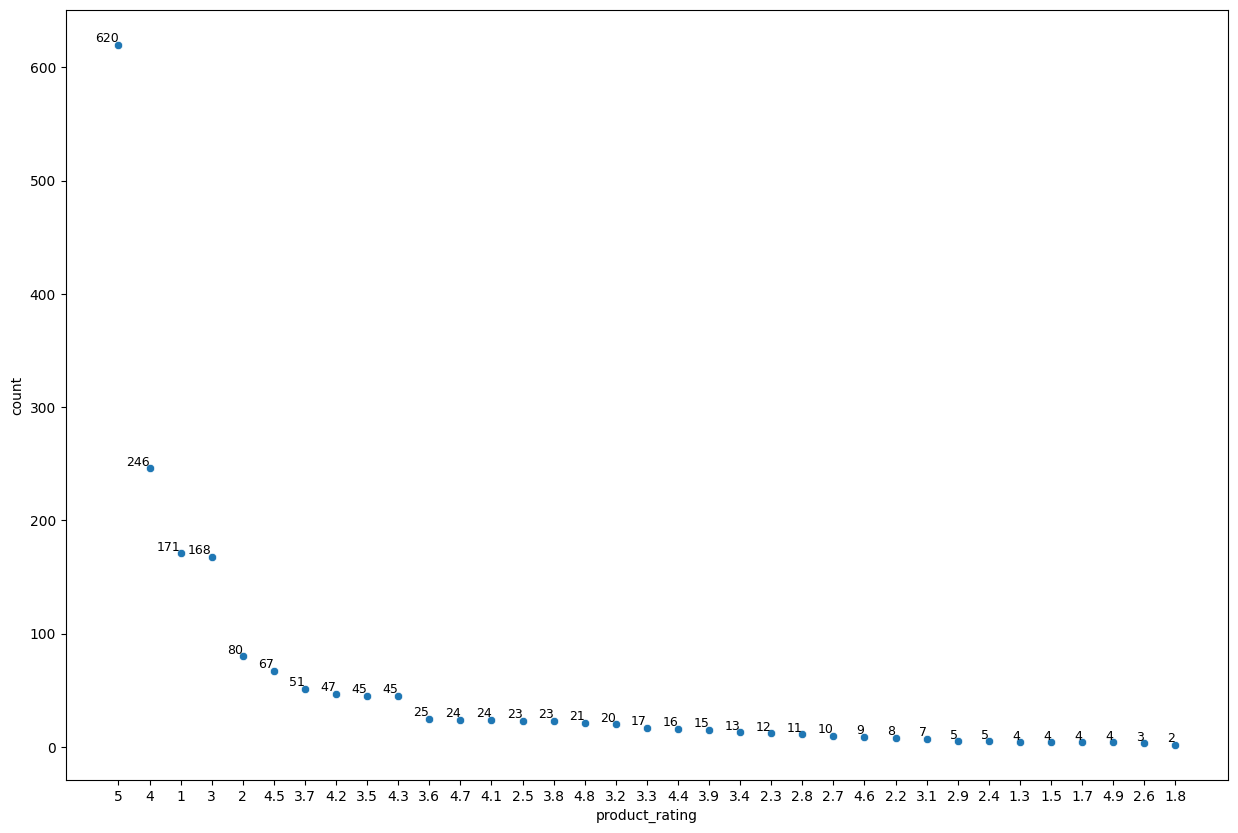

In [196]:
ratings = pd.DataFrame(df['product_rating']).value_counts().reset_index()
ratings = ratings.drop(index=0)
ratings.head()
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x='product_rating', y='count', data=ratings)

for i, row in ratings.iterrows():
    ax.text(row['product_rating'], row['count'], f'{row["count"]}', 
            fontsize=9, ha='right', va='bottom')

#Separating date and time

In [5]:
df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'], utc=True)
df['date'] = df['crawl_timestamp'].dt.date
df['time'] = df['crawl_timestamp'].dt.time

In [199]:
df.head()

uniq_id           crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9 2016-03-25 22:59:23+00:00   
1  7f7036a6d550aaa89d34c77bd39a5e48 2016-03-25 22:59:23+00:00   
2  f449ec65dcbc041b6ae5e6a32717d01b 2016-03-25 22:59:23+00:00   
3  0973b37acd0c664e3de26e97e5571454 2016-03-25 22:59:23+00:00   
4  bc940ea42ee6bef5ac7cea3fb5cfbee7 2016-03-25 22:59:23+00:00   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/fabhomedecor-fabric-do...   
2  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/sicons-all-purpose-arn...   

                            product_name  \
0    Alisha Solid Women's Cycling Shorts   
1    FabHomeDecor Fabric Double Sofa Bed   
2                             AW Bellies   
3    Alisha Solid Women's Cycling Shorts   
4  Sicons All Purpose Arnica Dog Shampoo   

                               product_category_tree               pid  \
0  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2FF9KEDEFGF   
1  ["Furniture >> Living Room Furniture >> Sofa B...  SBEEH3QGU7MFYJFY   
2  ["Footwear >> Women's Footwear >> Ballerinas >...  SHOEH4GRSUBJGZXE   
3  ["Clothing >> Women's Clothing >> Lingerie, Sl...  SRTEH2F6HUZMQ6SJ   
4  ["Pet Supplies >> Grooming >> Skin & Coat Care...  PSOEH3ZYDMSYARJ5   

   retail_price  discounted_price  \
0         999.0             379.0   
1       32157.0           22646.0   
2         999.0             499.0   
3         699.0             267.0   
4         220.0             210.0   

                                               image  is_FK_Advantage_product  \
0  ["http://img5a.flixcart.com/image/short/u/4/a/...                    False   
1  ["http://img6a.flixcart.com/image/sofa-bed/j/f...                    False   
2  ["http://img5a.flixcart.com/image/shoe/7/z/z/r...                    False   
3  ["http://img5a.flixcart.com/image/short/6/2/h/...                    False   
4  ["http://img5a.flixcart.com/image/pet-shampoo/...                    False   

                                         description       product_rating  \
0  Key Features of Alisha Solid Women's Cycling S...  No rating available   
1  FabHomeDecor Fabric Double Sofa Bed (Finish Co...  No rating available   
2  Key Features of AW Bellies Sandals Wedges Heel...  No rating available   
3  Key Features of Alisha Solid Women's Cycling S...  No rating available   
4  Specifications of Sicons All Purpose Arnica Do...  No rating available   

        overall_rating         brand  \
0  No rating available        Alisha   
1  No rating available  FabHomeDecor   
2  No rating available            AW   
3  No rating available        Alisha   
4  No rating available        Sicons   

                              product_specifications        date      time  
0  {"product_specification"=>[{"key"=>"Number of ...  2016-03-25  22:59:23  
1  {"product_specification"=>[{"key"=>"Installati...  2016-03-25  22:59:23  
2  {"product_specification"=>[{"key"=>"Ideal For"...  2016-03-25  22:59:23  
3  {"product_specification"=>[{"key"=>"Number of ...  2016-03-25  22:59:23  
4  {"product_specification"=>[{"key"=>"Pet Type",...  2016-03-25  22:59:23

#Calculating difference between retail price and discount price date wise

In [28]:
retail_price_date = pd.DataFrame(df.groupby('date')[['retail_price']].mean())
discount_price_date = pd.DataFrame(df.groupby('date')[['discounted_price']].mean())
df_price_diff = pd.concat([retail_price_date,discount_price_date], axis=1)

In [31]:
df_price_diff['date']

KeyError: 'date'

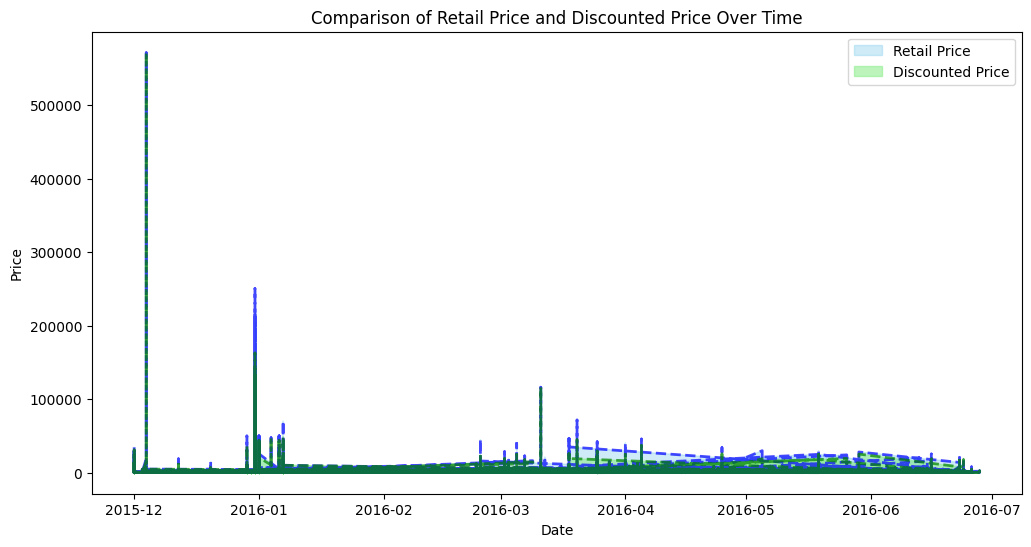

In [34]:
# Define variables
x = df['date']
y1 = df['retail_price']
y2 = df['discounted_price']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot areas
plt.fill_between(x, y1, color='skyblue', alpha=0.4, label='Retail Price')
plt.fill_between(x, y2, color='lightgreen', alpha=0.6, label='Discounted Price')

# Add lines for better visualization
plt.plot(x, y1, color='blue', alpha=0.7, linewidth=2, linestyle='--')
plt.plot(x, y2, color='green', alpha=0.7, linewidth=2, linestyle='--')

# Add labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Comparison of Retail Price and Discounted Price Over Time')
plt.legend()

# Show the plot
plt.show()

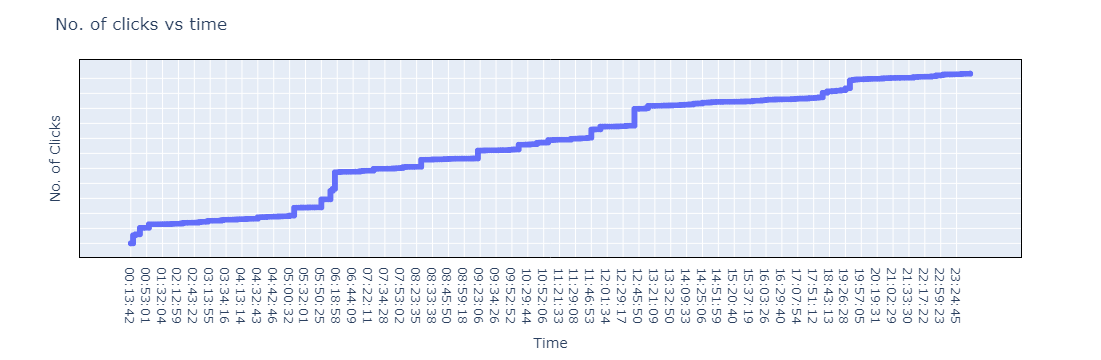

<Figure size 1000x2000 with 0 Axes>

In [37]:
plt.figure(figsize=(10,20))
scat2 = px.scatter(x=df['time'].sort_values(ascending=True), y=df['product_url'])
scat2.update_layout(
    title_text='No. of clicks vs time',
    xaxis_title_text='Time',
    yaxis_title_text='No. of Clicks'
)

scat2.update_yaxes(showticklabels=False)
scat2.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
scat2.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
scat2.show()